In [13]:
import os
import json
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./model_recovery_fit_df.csv')
df.head()

,Unnamed: 0,lightcurve,true_model,lightcurve_path,true_params,true_lightcurve,fit_model,fit_path,t_max,residual,log_likelihood,log_prior,log_bayes_factor,best_fit_params,best_fit_lightcurve
0,0,Bu2019lm_00000,Bu2019lm,./characteristic_injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 7....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Bu2019lm,./model_recovery_timestep/lc_Bu2019lm_00000/Bu...,3.0,8.050780,-5.525511,-9.725559,-8.812757,"{'luminosity_distance': 6.514705615072107, 'KN...","{'ztfg': {0: 16.737290695454522, 1: 13.1219203..."
1,1,Bu2019lm_00000,Bu2019lm,./characteristic_injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 7....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Piro2021,./model_recovery_timestep/lc_Bu2019lm_00000/Pi...,3.0,27.369321,-5.588291,-12.429216,-13.664987,"{'luminosity_distance': 35.88141540386808, 'ti...","{'ztfg': {0: 15.733386209898928, 1: 13.8184316..."
2,2,Bu2019lm_00000,Bu2019lm,./characteristic_injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 7....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",TrPi2018,./model_recovery_timestep/lc_Bu2019lm_00000/Tr...,3.0,97.539924,-5.544315,-10.139287,-10.121956,"{'luminosity_distance': 170.0587546147348, 'ti...","{'ztfg': {0: 13.026401980070524, 1: 12.5698337..."
3,3,Bu2019lm_00000,Bu2019lm,./characteristic_injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 7....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",nugent-hyper,./model_recovery_timestep/lc_Bu2019lm_00000/nu...,3.0,33.216187,-8.065403,-7.313220,-12.373080,"{'luminosity_distance': 170.6897604563875, 'ti...","{'ztfg': {0: 16.763679988978737, 1: 14.8183018..."
4,4,Bu2019lm_00000,Bu2019lm,./characteristic_injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 7....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Bu2019lm,./model_recovery_timestep/lc_Bu2019lm_00000/Bu...,4.0,10.168329,-7.381461,-10.152985,-10.995705,"{'luminosity_distance': 5.03681939346171, 'KNp...","{'ztfg': {0: 16.22114891558217, 1: 12.92754438..."


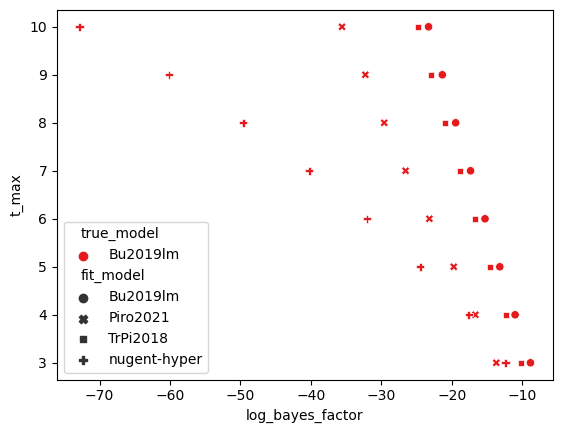

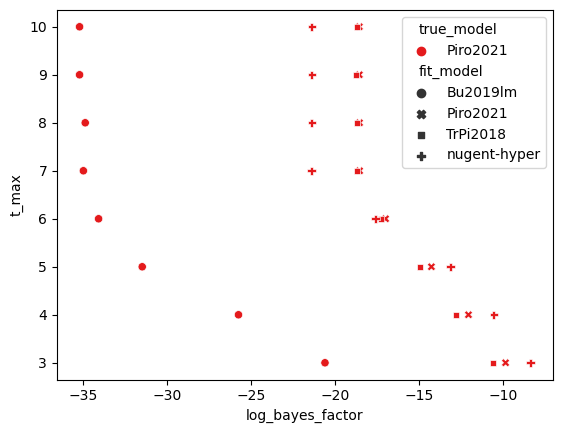

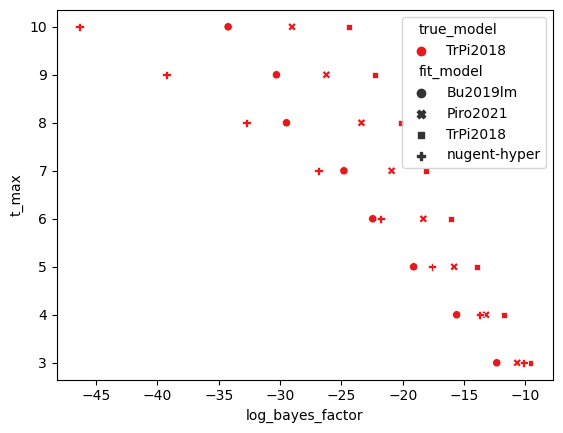

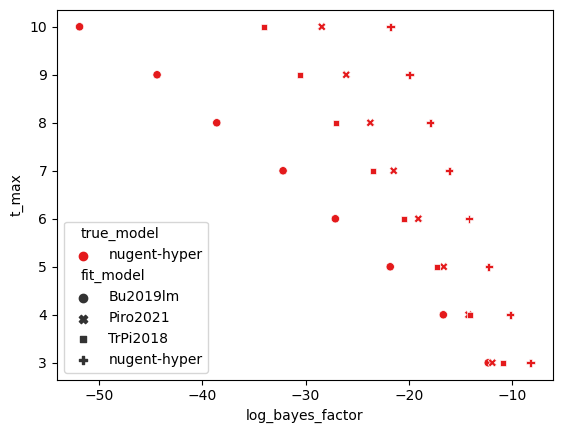

In [16]:
for model in df['true_model'].unique():
    sns.scatterplot(data=df[df['true_model']==model], x='log_bayes_factor', y='t_max', hue='true_model', style='fit_model', palette='Set1')
    plt.show()

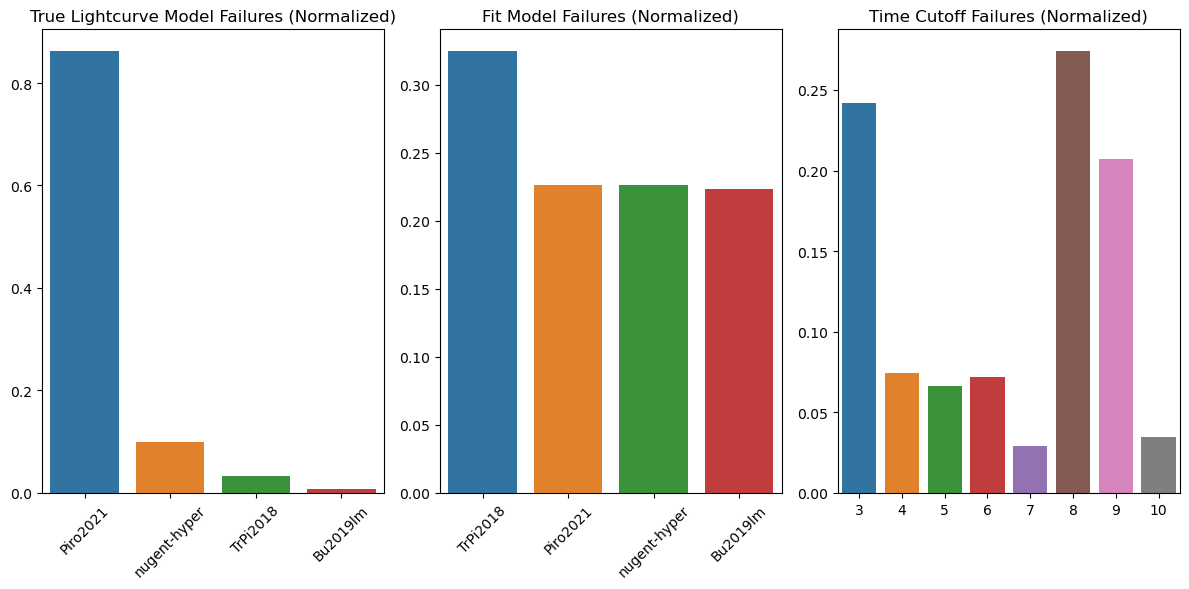

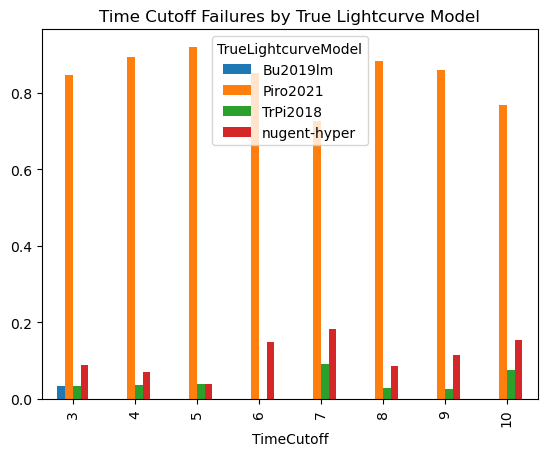

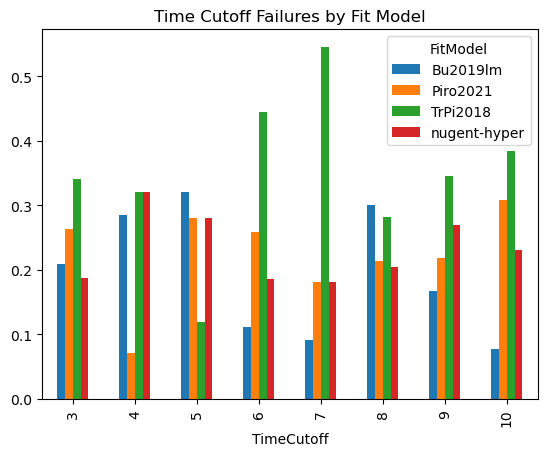

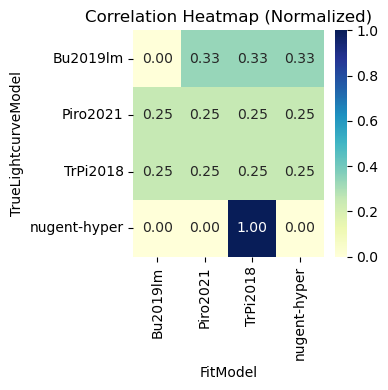

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the text file into a DataFrame
file_path = "model-recovery-failures.txt"  # Replace with the actual file path
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the data from file names and create a DataFrame
data = []
for line in lines:
    parts = line.strip().split('/')
    filename = parts[-1]
    model_parts = filename.split('_')
    true_lightcurve_model = model_parts[1]
    unique_identifier = model_parts[2]
    fit_model = model_parts[4]
    time_cutoff = int(model_parts[-1].split('_tmax_')[-1].split('.')[0])
    data.append([true_lightcurve_model, unique_identifier, fit_model, time_cutoff])

df = pd.DataFrame(data, columns=['TrueLightcurveModel', 'UniqueIdentifier', 'FitModel', 'TimeCutoff'])

# Calculate statistics and normalize
total_entries = len(df)

true_lightcurve_failures = df['TrueLightcurveModel'].value_counts(normalize=True)
fit_model_failures = df['FitModel'].value_counts(normalize=True)
time_cutoff_failures = df['TimeCutoff'].value_counts(normalize=True)

# Create a heatmap to explore correlations between true lightcurve models and fit models
heatmap_data = df.groupby(['TrueLightcurveModel', 'FitModel']).size().unstack().fillna(0).apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(12, 6))

plt.subplot(131)
sns.barplot(x=true_lightcurve_failures.index, y=true_lightcurve_failures.values)
plt.title('True Lightcurve Model Failures (Normalized)')
plt.xticks(rotation=45)

plt.subplot(132)
sns.barplot(x=fit_model_failures.index, y=fit_model_failures.values)
plt.title('Fit Model Failures (Normalized)')
plt.xticks(rotation=45)

plt.subplot(133)
sns.barplot(x=time_cutoff_failures.index, y=time_cutoff_failures.values)
plt.title('Time Cutoff Failures (Normalized)')
plt.tight_layout()
plt.show()

# Additional plots based on time cutoff failures
# plt.figure(figsize=(15, 6))

# # Plot based on the third value as True Lightcurve Model
# plt.subplot(121)
time_cutoff_by_true_lightcurve = df.groupby(['TimeCutoff', 'TrueLightcurveModel']).size().unstack().fillna(0).apply(lambda x: x / x.sum(), axis=1)
time_cutoff_by_true_lightcurve.plot(kind='bar', stacked=False)
plt.title('Time Cutoff Failures by True Lightcurve Model')
plt.show()

# Plot based on the third value as Fit Model
# plt.subplot(122)
time_cutoff_by_fit_model = df.groupby(['TimeCutoff', 'FitModel']).size().unstack().fillna(0).apply(lambda x: x / x.sum(), axis=1)
time_cutoff_by_fit_model.plot(kind='bar', stacked=False)
plt.title('Time Cutoff Failures by Fit Model')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(141)
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Correlation Heatmap (Normalized)')

plt.tight_layout()
plt.show()


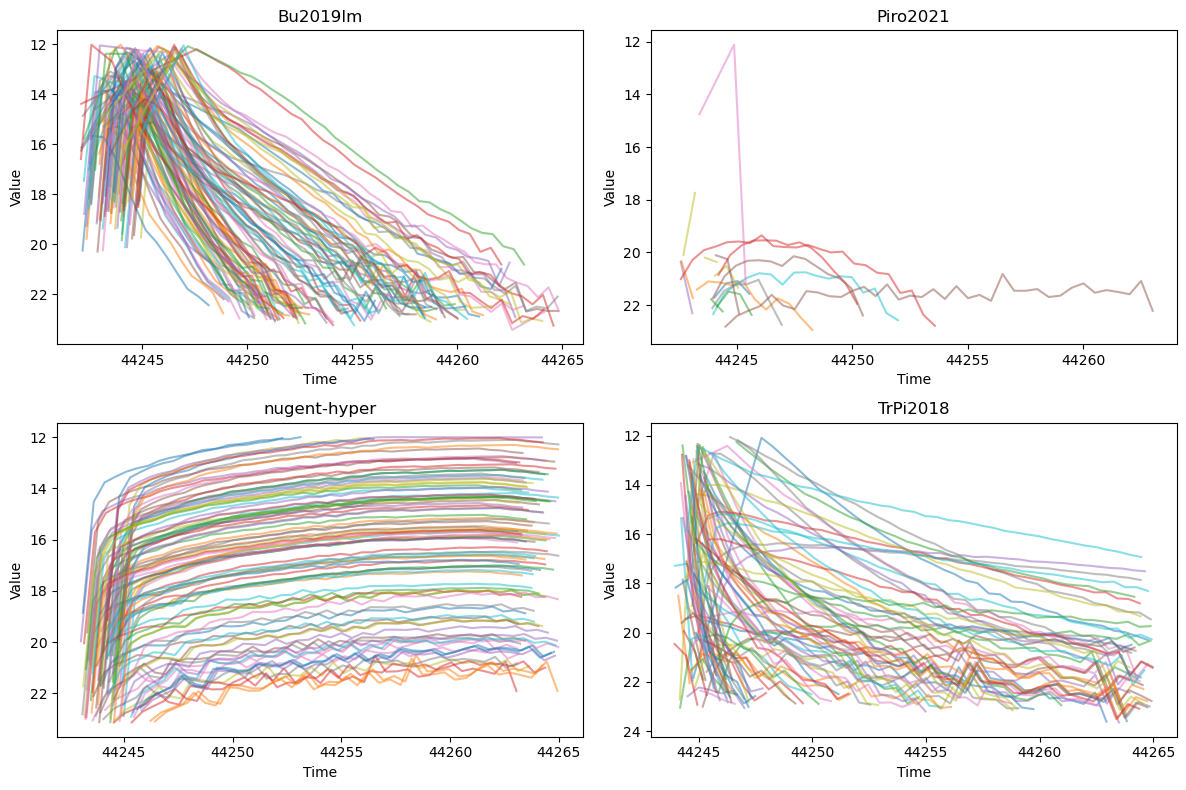

In [52]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

folder_path = 'model-recovery-injections'
model_data = {}

for filename in os.listdir(folder_path):
    if filename.startswith("lc_") and filename.endswith(".json"):
        model_name = filename.split("_")[1]
        with open(os.path.join(folder_path, filename), 'r') as file:
            data = json.load(file)
            ztfg_data = data.get("ztfg", [])

        if model_name not in model_data:
            model_data[model_name] = []
        model_data[model_name].append(ztfg_data)

plt.figure(figsize=(12, 8))

## Iterate through model data and plot each lightcurve as a separate line
num_plots = len(model_data)
rows = num_plots // 2 + num_plots % 2  ## Determine the number of rows for subplots
for i, (model_name, lc_list) in enumerate(model_data.items()):
    ax = plt.subplot(rows, 2, i + 1)
    [sns.lineplot(data=pd.DataFrame(lc_data, columns=["Time", "Value", "Uncertainty"]), x="Time", y="Value", alpha=0.5) 
     for lc_data in lc_list]
    plt.title(model_name)
    plt.xlabel("Time")
    plt.ylabel("Value")
    ax.invert_yaxis()

plt.tight_layout()
plt.show()